In [21]:
import requests

server = 'api.outbreak.info' # or 'dev.outbreak.info'
auth = 'Bearer 0ed52bbfb6c79d1fd8e9c6f267f9b6311c885a4c4c6f037d6ab7b3a40d586ad0' # keep this private!
nopage = 'fetch_all=true&page=0' # worth verifying that this works with newer ES versions as well

def get_outbreak_data(endpoint, argstring, server=server, auth=auth):
    auth = {'Authorization': str(auth)}
    return requests.get(f'https://{server}/{endpoint}?={argstring}', headers=auth)

In [27]:
pango_lin = 'b.1.1.7'
loc_id = 'GBR'
data = get_outbreak_data('genomics/prevalence-by-location', f"pangolin_lineage={pango_lin}&location_id={loc_id}&sort=date&fields=date_collected,lineage_count&{nopage}")

In [28]:
data.json()

{'success': True,
 'results': {'b.1.1.7': [{'date': '2020-03-20',
    'total_count': 411,
    'lineage_count': 1,
    'total_count_rolling': 276.7142857142857,
    'lineage_count_rolling': 0.14285714285714285,
    'proportion': 0.0005162622612287041,
    'proportion_ci_lower': 1.771087192292848e-06,
    'proportion_ci_upper': 0.009019279748707218},
   {'date': '2020-03-21',
    'total_count': 434,
    'lineage_count': 0,
    'total_count_rolling': 315.0,
    'lineage_count_rolling': 0.14285714285714285,
    'proportion': 0.0004535147392290249,
    'proportion_ci_lower': 1.5576019721417432e-06,
    'proportion_ci_upper': 0.007936430834625554},
   {'date': '2020-03-22',
    'total_count': 390,
    'lineage_count': 0,
    'total_count_rolling': 347.2857142857143,
    'lineage_count_rolling': 0.14285714285714285,
    'proportion': 0.0004113533525298231,
    'proportion_ci_lower': 1.4140650370424514e-06,
    'proportion_ci_upper': 0.007207711343976978},
   {'date': '2020-03-23',
    'total_

In [4]:
import pandas as pd
raw=data.json()["hits"]

In [ ]:
import sys
sys.path.append('..')
from outbreak_data import *

In [5]:
tableGBR=outbreak_data.cases_by_location('GBR')
tableGBR.drop(columns=['_score', 'admin1'], axis=1

,_id,_score,confirmed_numIncrease,date
0,GBR_None_None2020-04-14,8.508196,4325,2020-04-14
1,GBR_None_None2020-04-27,8.508196,4702,2020-04-27
2,GBR_None_None2020-05-06,8.508196,3831,2020-05-06
3,GBR_None_None2020-05-07,8.508196,3767,2020-05-07
4,GBR_None_None2020-05-08,8.508196,3049,2020-05-08
...,...,...,...,...
857,GBR_None_None2022-05-13,8.361235,6587,2022-05-13
858,GBR_None_None2022-05-14,8.361235,0,2022-05-14
859,GBR_None_None2022-05-15,8.361235,0,2022-05-15
860,GBR_None_None2022-06-06,8.361235,33053,2022-06-06


In [6]:
tableGBR.sort_values(by="date")
tableGBR.plot.line(x='date', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')

,ID,cases,date
0,GBR_None_None2020-04-14,4325,2020-04-14
1,GBR_None_None2020-04-27,4702,2020-04-27
2,GBR_None_None2020-05-06,3831,2020-05-06
3,GBR_None_None2020-05-07,3767,2020-05-07
4,GBR_None_None2020-05-08,3049,2020-05-08
...,...,...,...
857,GBR_None_None2022-05-13,6587,2022-05-13
858,GBR_None_None2022-05-14,0,2022-05-14
859,GBR_None_None2022-05-15,0,2022-05-15
860,GBR_None_None2022-06-06,33053,2022-06-06


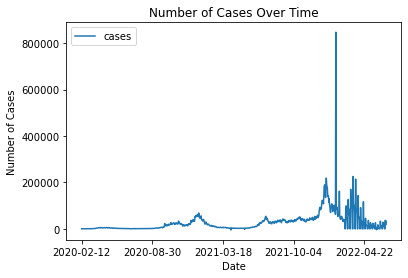

In [7]:
tableGBR['month_year'] = pd.to_datetime(tableGBR['date']).dt.to_period('M')
tableGBR.plot.line(x='month_year', y='confirmed_numIncrease', title='Number of Cases Over Time', xlabel='Date', ylabel='Number of Cases')